In [69]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime, timedelta
from lxml import etree

In [26]:
# Initialize parser
parser = etree.HTMLParser()

In [71]:
import requests
from datetime import date, timedelta
from bs4 import BeautifulSoup
import csv
import requests
from datetime import date, timedelta
from bs4 import BeautifulSoup
import csv
import concurrent.futures

In [72]:
# Function to fetch data for a specific date
def fetch_data_for_date(date_str):
    url = f"https://admn5015-340805.uc.r.appspot.com/{date_str}.html"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        price = soup.find("td", {"id": "price"}).text
        likes = soup.find("td", {"id": "likes"}).text
        dislikes = soup.find("td", {"id": "dislikes"}).text
        followers = soup.find("td", {"id": "followers"}).text
        return [date_str, price, likes, dislikes, followers]
    else:
        print(f"Failed to fetch data for {date_str}")
        return None


In [74]:
start_date = date(2018, 1, 1)
end_date = date(2023, 12, 31)  # Adjust the end date as needed
delta = timedelta(days=1)
date_range = [start_date + delta * i for i in range((end_date - start_date).days + 1)]


In [75]:
# Fetch data for each date
with open('scraped_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Price', 'Likes', 'Dislikes', 'Followers'])
    for date in date_range:
        data = fetch_data_for_date(date.strftime('%Y-%m-%d'))
        if data:
            writer.writerow(data)

Failed to fetch data for 2018-06-29
Failed to fetch data for 2018-08-22


In [77]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('scraped_data.csv')

# Display the first few rows using df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2189 non-null   object
 1   Price      2189 non-null   object
 2   Likes      2189 non-null   int64 
 3   Dislikes   2189 non-null   int64 
 4   Followers  2189 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.6+ KB
None


In [79]:
# File path to the CSV
file_path = 'C:\\Users\\drdav\\data\\scraped_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2191 non-null   object
 1   Price      2191 non-null   object
 2   Likes      2191 non-null   int64 
 3   Dislikes   2191 non-null   int64 
 4   Followers  2191 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.7+ KB
None


In [80]:
# Assuming 'df' contains your DataFrame
file_path = 'C:\\Users\\drdav\\data\\scraped_data.csv'
df.to_csv(file_path, index=False)

In [83]:
import pandas as pd
from bs4 import BeautifulSoup
from lxml import etree
import requests

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error

In [84]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

In [85]:
df = pd.read_csv("C:/Users/drdav/scraped_data.csv")
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2018-01-01,$ 1006.39 CAD,9001,402,15002
1,2018-01-02,$ 1011.81 CAD,9003,403,15003
2,2018-01-03,$ 1017.26 CAD,9004,405,15004
3,2018-01-04,$ 1022.74 CAD,9006,407,15006
4,2018-01-05,$ 1028.25 CAD,9008,408,15008


In [86]:
df.shape

(2189, 5)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2189 non-null   object
 1   Price      2189 non-null   object
 2   Likes      2189 non-null   int64 
 3   Dislikes   2189 non-null   int64 
 4   Followers  2189 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.6+ KB


In [88]:
# Split the "Price" column into three separate columns
df[['Currency symbol', 'Price', 'Currency']] = df['Price'].str.split(' ', 2, expand=True)

# Display the updated DataFrame
print(df.head())

         Date    Price  Likes  Dislikes  Followers Currency symbol Currency
0  2018-01-01  1006.39   9001       402      15002               $      CAD
1  2018-01-02  1011.81   9003       403      15003               $      CAD
2  2018-01-03  1017.26   9004       405      15004               $      CAD
3  2018-01-04  1022.74   9006       407      15006               $      CAD
4  2018-01-05  1028.25   9008       408      15008               $      CAD


C:\Users\drdav\AppData\Local\Temp\ipykernel_19164\1806753593.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Currency symbol', 'Price', 'Currency']] = df['Price'].str.split(' ', 2, expand=True)


In [89]:
df.drop(columns=["Currency symbol", "Currency"], inplace=True)
print(df.head())

         Date    Price  Likes  Dislikes  Followers
0  2018-01-01  1006.39   9001       402      15002
1  2018-01-02  1011.81   9003       403      15003
2  2018-01-03  1017.26   9004       405      15004
3  2018-01-04  1022.74   9006       407      15006
4  2018-01-05  1028.25   9008       408      15008


In [90]:
df["Price"] = (df["Price"].astype(float))
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2018-01-01,1006.39,9001,402,15002
1,2018-01-02,1011.81,9003,403,15003
2,2018-01-03,1017.26,9004,405,15004
3,2018-01-04,1022.74,9006,407,15006
4,2018-01-05,1028.25,9008,408,15008


In [91]:
# Assuming 'Date' is the name of the datetime column
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2189 non-null   datetime64[ns]
 1   Price      2189 non-null   float64       
 2   Likes      2189 non-null   int64         
 3   Dislikes   2189 non-null   int64         
 4   Followers  2189 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 85.6 KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2189.0,118102.802344,166285.409111,1006.39,7313.67,34943.06,163136.32,445911.69
Likes,2189.0,11128.880767,1267.280280,9001.00,10004.00,11203.00,12200.00,13396.00
Dislikes,2189.0,2066.073093,959.473394,402.00,1236.00,2073.00,2894.00,3714.00
Followers,2189.0,17127.287346,1261.184676,15002.00,16013.00,17201.00,18200.00,19377.00


C:\Users\drdav\AppData\Local\Temp\ipykernel_19164\3929816486.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')


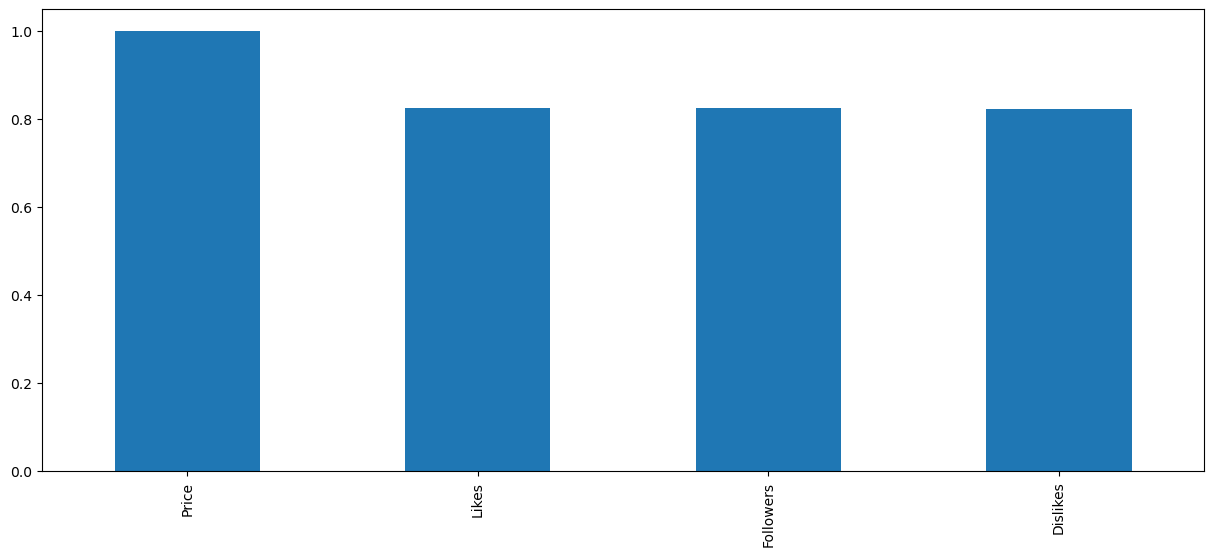

In [94]:
# Plot data
plt.figure(figsize=(15,6))
bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

In [95]:
df.corr()

C:\Users\drdav\AppData\Local\Temp\ipykernel_19164\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Likes,Dislikes,Followers
Price,1.000000,0.826156,0.823849,0.825501
Likes,0.826156,1.000000,0.999502,0.999985
Dislikes,0.823849,0.999502,1.000000,0.999529
Followers,0.825501,0.999985,0.999529,1.000000


C:\Users\drdav\AppData\Local\Temp\ipykernel_19164\3034980156.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")


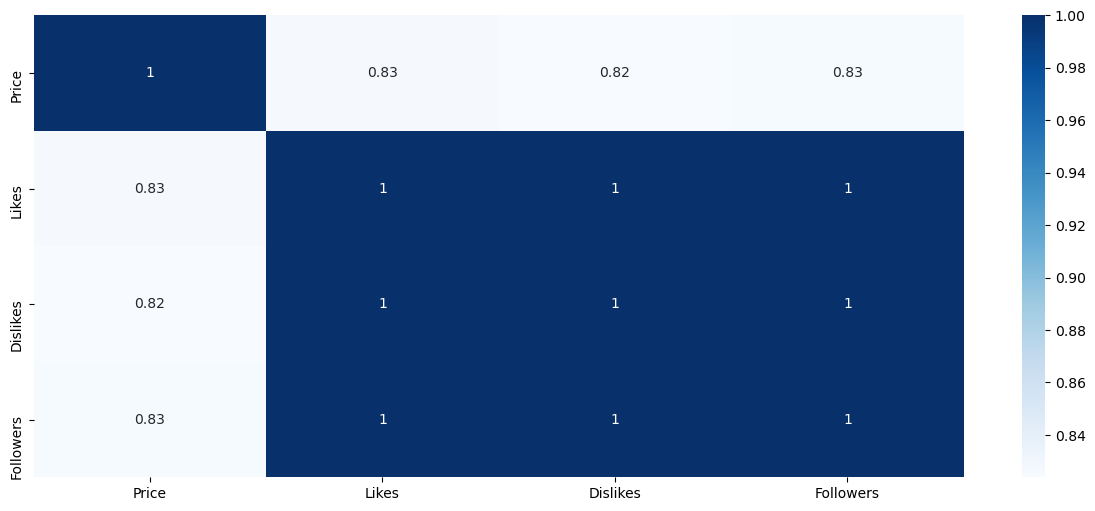

In [96]:
# Create a heatmap

plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

The correlation matrix indicates the correlation coefficients between different pairs of variables in this DataFrame.
##### Price and Likes:
    The correlation coefficient between Price and Likes is 0.8262. This suggests a strong positive correlation, indicating that as the number of Likes increases, the Price tends to increase as well.
##### Price and Dislikes:
    The correlation coefficient between Price and Dislikes is 0.8238. Similar to Likes, there is a strong positive correlation, suggesting that as the number of Dislikes increases, the Price tends to increase.
##### Price and Followers:
    The correlation coefficient between Price and Followers is 0.8255. Again, there is a strong positive correlation, indicating that as the number of Followers increases, the Price tends to increase.
##### Likes and Dislikes:
    The correlation coefficient between Likes and Dislikes is 0.9995. This extremely high correlation suggests that Likes and Dislikes are almost perfectly correlated, which might indicate redundancy in your features.
##### Likes and Followers:
    The correlation coefficient between Likes and Followers is 0.99999. Similar to Likes and Dislikes, there's an extremely high positive correlation, indicating that Likes and Followers are almost perfectly correlated.
##### Dislikes and Followers:
    The correlation coefficient between Dislikes and Followers is 0.9995. Like Likes and Followers, there's an extremely high positive correlation between Dislikes and Followers.

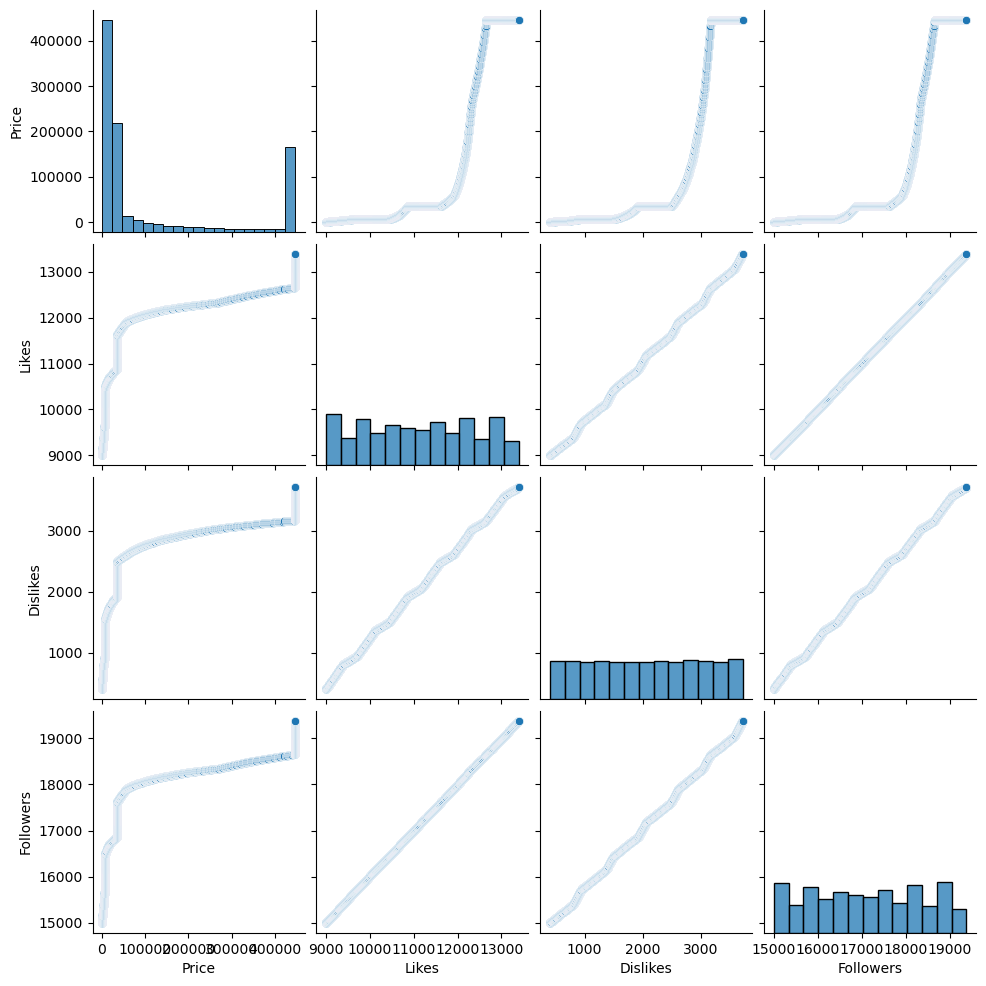

In [97]:
# Creating a scatter plot pairwise
sns.pairplot(df)

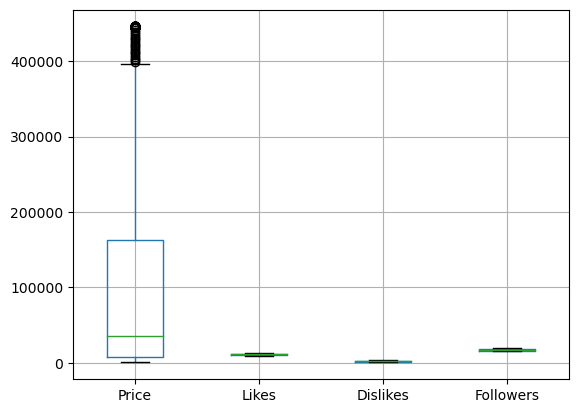

In [98]:
df.boxplot(column=['Price', 'Likes', 'Dislikes', 'Followers'])
plt.show()

Text(0.5, 1.0, 'Distribution of Prices')

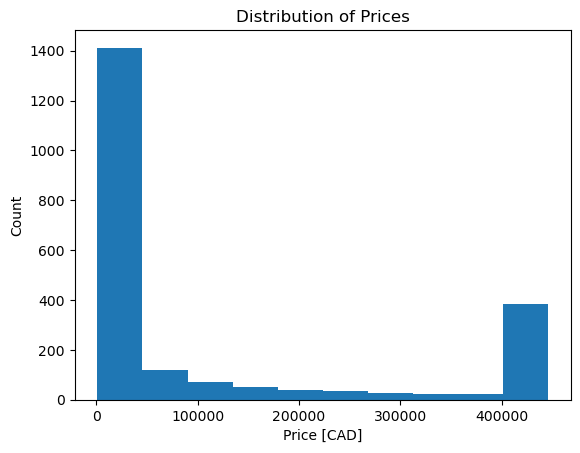

In [99]:
plt.hist(df["Price"])


# Label axes
plt.xlabel("Price [CAD]")
plt.ylabel("Count")

# Add title
plt.title("Distribution of Prices")

In [100]:
# Create traning and testing datasets
 
x = df[['Likes', 'Dislikes', 'Followers']]
y = df['Price']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [101]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean retail price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean retail price: 120373.81958224543
Baseline MAE: 140044.50048255152


In [102]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [103]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\drdav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.710e+12, tolerance: 4.326e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\drdav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e+12, tolerance: 3.951e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\drdav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.160e+12, toleranc

In [104]:
# Order performance model results
 
df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
0,RandomForestRegressor,0.06,344
0,DecisionTreeRegressor,0.0,623
0,XGBRegressor,0.01,1782
0,Ridge,0.0,90651
0,Lars,0.0,90651
0,ARDRegression,0.0,90665
0,BayesianRidge,0.0,90667
0,ElasticNet,0.0,92747
0,OrthogonalMatchingPursuit,0.0,93126
0,HuberRegressor,0.0,98291


In [105]:
# Evaluate the best model
 
regressor = RandomForestRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

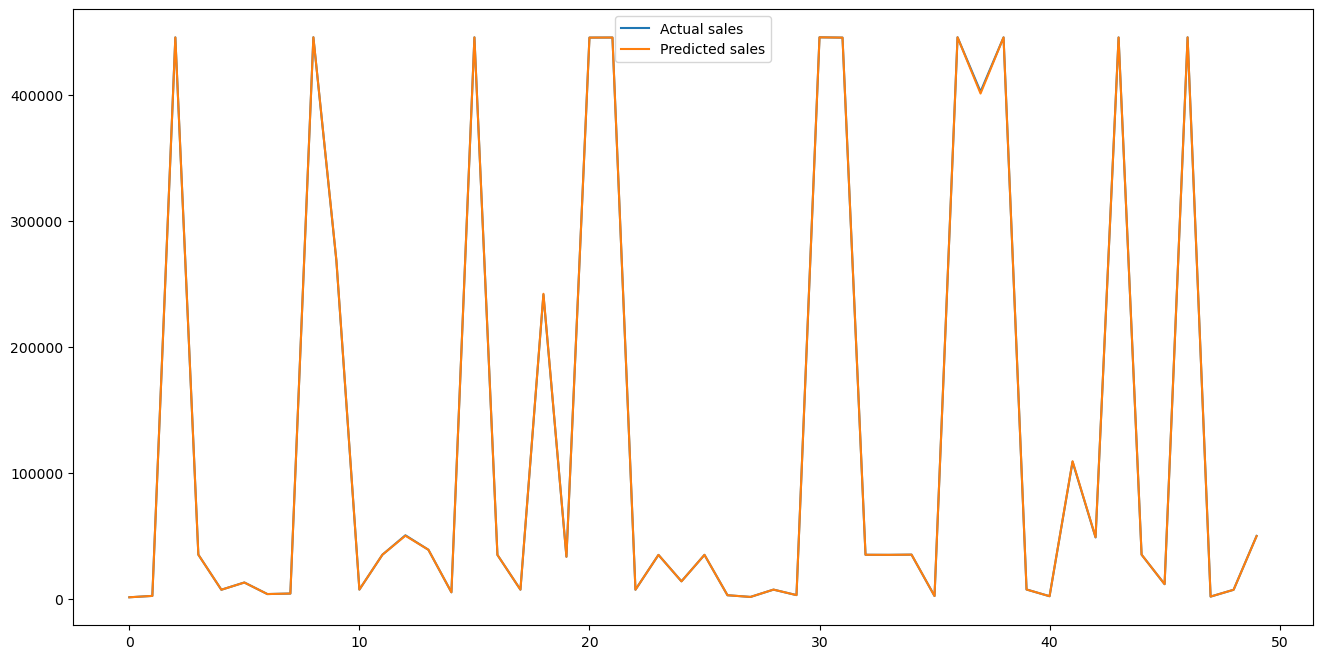

In [106]:
# Plot
 
test = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])

In [107]:
# Predict a new Price amount

temp_data = {   'Likes' : [13396],
                'Dislikes' : [3714],
                'Followers' : [19377]
        }

df_price_input = pd.DataFrame(temp_data, columns = ['Likes', 'Dislikes', 'Followers'])

df_price_prediction_result = model.predict(df_price_input)

df_price_prediction_result

array([445592.5878])

In [108]:
# Finding the most recent data point before January 1st, 2024 because there are no data for january 1st
most_recent_data = df[df['Date'] < '2024-01-01'].iloc[-1]

In [109]:
# Extract the feature values
recent_likes_value = most_recent_data['Likes']
recent_dislikes_value = most_recent_data['Dislikes']
recent_followers_value = most_recent_data['Followers']

In [110]:
# Create a DataFrame for the input data
df_january_1_2024 = pd.DataFrame({
    'Likes': [recent_likes_value],
    'Dislikes': [recent_dislikes_value],
    'Followers': [recent_followers_value]
}, columns=['Likes', 'Dislikes', 'Followers'])


In [111]:
# Use the trained model to predict the price for January 1st, 2024
predicted_price_2024 = model.predict(df_january_1_2024)


In [112]:
# Display the predicted price
print(f'The predicted price for January 1st, 2024, is: {predicted_price_2024[0]}')

The predicted price for January 1st, 2024, is: 445592.5878000006


#### The model demonstrates the following:

##### Baseline Model Evaluation:
The mean retail price in the training dataset is approximately $120,373.82. The baseline model, which predicts the mean retail price for all instances, has a Mean Absolute Error (MAE) of approximately $140,044.50.

##### Prediction for January 1st, 2024:
I found the most recent data point before January 1st, 2024, since there is no data available for that date.
Extracted the feature values (Likes, Dislikes, Followers) from the most recent data point.
Created a DataFrame with these feature values for January 1st, 2024.
Used my trained RandomForestRegressor model to predict the price for January 1st, 2024.
The predicted price for January 1st, 2024, is approximately $445,592.59.

These results suggest that my trained model, based on historical data, predicts a significantly different price for January 1st, 2024, compared to the baseline model. The model takes into account the patterns in the data and provides a more refined prediction for the given feature values.